In [1]:

# Importing the libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os


import seaborn as sns
from subprocess import check_output
# Reading the dataset
#data = pd.read_csv("loan.csv", "r")
#data_1 = pd.DataFrame(data) # Creating a copy

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
data = open('phase2Data4.csv',"r")
#loan = pd.read_csv(data)
#data_1 = pd.DataFrame(data) # Creating a copy

In [2]:
loan = pd.read_csv(data)

In [3]:
loan.head()

,ï»¿id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,NaN,NaN,40000,40000,40000.0,60 months,10.90,867.71,B,B4,...,50.0,0,0,540677,99792,58700,94255,N,Cash,N
1,NaN,NaN,15000,15000,15000.0,36 months,11.98,498.08,B,B5,...,0.0,0,0,78165,19667,23700,5265,N,Cash,N
2,NaN,NaN,35000,35000,35000.0,60 months,22.90,984.66,E,E1,...,23.8,0,0,565563,117245,75800,84082,N,Cash,N
3,NaN,NaN,21500,21500,21500.0,60 months,15.04,511.94,C,C4,...,0.0,0,0,143800,61733,68800,75000,N,Cash,N
4,NaN,NaN,20400,20400,20400.0,36 months,6.71,627.20,A,A3,...,20.0,0,0,104780,43214,52600,52180,N,Cash,N


In [4]:
def null_values(loan):
        mis_val = loan.isnull().sum()
        mis_val_percent = 100 * loan.isnull().sum() / len(loan)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Dataframe has " + str(loan.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [5]:
miss_values = null_values(loan)
miss_values.head(20)

Dataframe has 112 columns.
There are 38 columns that have missing values.


,Missing Values,% of Total Values
ï»¿id,105665,100.0
member_id,105665,100.0
verification_status_joint,99971,94.6
dti_joint,99590,94.3
annual_inc_joint,99589,94.2
mths_since_last_record,91660,86.7
mths_since_recent_bc_dlq,82817,78.4
mths_since_last_major_derog,78779,74.6
mths_since_recent_revol_delinq,72796,68.9
mths_since_last_delinq,56190,53.2


In [6]:
loan.shape

(105665, 112)

In [7]:
check_null = loan.isnull().sum(axis=0).sort_values(ascending=False)/float(len(loan))
loan.drop(check_null[check_null>0.6].index, axis=1, inplace=True) 
loan.dropna(axis=0, thresh=30, inplace=True)

In [8]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,40000,40000,40000.0,60 months,10.90,867.71,B,B4,"Director, Oracle Technology",10+ years,...,50.0,0,0,540677,99792,58700,94255,N,Cash,N
1,15000,15000,15000.0,36 months,11.98,498.08,B,B5,Technical Service Advisor,10+ years,...,0.0,0,0,78165,19667,23700,5265,N,Cash,N
2,35000,35000,35000.0,60 months,22.90,984.66,E,E1,Field Service Technician,9 years,...,23.8,0,0,565563,117245,75800,84082,N,Cash,N
3,21500,21500,21500.0,60 months,15.04,511.94,C,C4,Computer Technology Instructor,10+ years,...,0.0,0,0,143800,61733,68800,75000,N,Cash,N
4,20400,20400,20400.0,36 months,6.71,627.20,A,A3,service techncian,5 years,...,20.0,0,0,104780,43214,52600,52180,N,Cash,N


In [9]:
loan.groupby('loan_status').describe()

loan_amnt                                                \
                       count          mean           std      min      25%   
loan_status                                                                  
Charged Off           8678.0  16205.897096   9129.649992   1000.0   9500.0   
Current              58594.0  16483.439857   9927.099237   1000.0   9300.0   
Default                  1.0  40000.000000           NaN  40000.0  40000.0   
Fully Paid           36539.0  14544.736446   8936.992768   1000.0   7500.0   
In Grace Period        498.0  18063.504016   9779.513301   1000.0  10000.0   
Late (16-30 days)      173.0  18948.265896  10264.761628   1600.0  10000.0   
Late (31-120 days)    1182.0  17409.517766   9873.420749   1000.0  10000.0   

                                              funded_amnt                ...  \
                        50%      75%      max       count          mean  ...   
loan_status                                                              ...   
Charged Off         15000.0  22000.0  40000.0      8678.0  16205.897096  ...   
Current             15000.0  23000.0  40000.0     58594.0  16483.439857  ...   
Default             40000.0  40000.0  40000.0         1.0  40000.000000  ...   
Fully Paid          12000.0  20000.0  40000.0     36539.0  14544.736446  ...   
In Grace Period     16000.0  25000.0  40000.0       498.0  18063.504016  ...   
Late (16-30 days)   18000.0  25000.0  40000.0       173.0  18948.265896  ...   
Late (31-120 days)  15000.0  24175.0  40000.0      1182.0  17409.517766  ...   

                   total_bc_limit           total_il_high_credit_limit  \
                              75%       max                      count   
loan_status                                                              
Charged Off               25387.5  228800.0                     8678.0   
Current                   36000.0  324800.0                    58594.0   
Default                   39700.0   39700.0                        1.0   
Fully Paid                32000.0  258600.0                    36539.0   
In Grace Period           26975.0  167000.0                      498.0   
Late (16-30 days)         34375.0  105700.0                      173.0   
Late (31-120 days)        26975.0  212800.0                     1182.0   

                                                                            \
                            mean           std      min       25%      50%   
loan_status                                                                  
Charged Off         45584.890873  38501.807114      0.0  19605.00  37537.5   
Current             45668.788699  41320.937959      0.0  18000.00  36127.0   
Default             74153.000000           NaN  74153.0  74153.00  74153.0   
Fully Paid          44371.353732  39747.861714      0.0  18376.00  35382.0   
In Grace Period     48240.608434  43317.290061      0.0  19952.00  36433.5   
Late (16-30 days)   53519.173410  44363.969892      0.0  23236.00  43080.0   
Late (31-120 days)  47551.238579  43395.764696      0.0  18285.75  38012.0   

                                         
                         75%        max  
loan_status                              
Charged Off         61724.00   433591.0  
Current             62786.00   612027.0  
Default             74153.00    74153.0  
Fully Paid          60033.00  1380346.0  
In Grace Period     65641.75   381533.0  
Late (16-30 days)   76015.00   293961.0  
Late (31-120 days)  64560.75   319466.0  

[7 rows x 640 columns]

In [10]:
dfcheck = loan[(loan.loan_status == "Charged Off") | (loan.loan_status == "Fully Paid")]

In [11]:
dfcheck.groupby('loan_status').describe()

loan_amnt                                                      \
                count          mean          std     min     25%      50%   
loan_status                                                                 
Charged Off    8678.0  16205.897096  9129.649992  1000.0  9500.0  15000.0   
Fully Paid    36539.0  14544.736446  8936.992768  1000.0  7500.0  12000.0   

                              funded_amnt                ... total_bc_limit  \
                 75%      max       count          mean  ...            75%   
loan_status                                              ...                  
Charged Off  22000.0  40000.0      8678.0  16205.897096  ...        25387.5   
Fully Paid   20000.0  40000.0     36539.0  14544.736446  ...        32000.0   

                      total_il_high_credit_limit                              \
                  max                      count          mean           std   
loan_status                                                                    
Charged Off  228800.0                     8678.0  45584.890873  38501.807114   
Fully Paid   258600.0                    36539.0  44371.353732  39747.861714   

                                                        
             min      25%      50%      75%        max  
loan_status                                             
Charged Off  0.0  19605.0  37537.5  61724.0   433591.0  
Fully Paid   0.0  18376.0  35382.0  60033.0  1380346.0  

[2 rows x 640 columns]

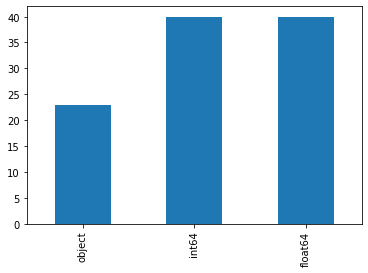

In [12]:
dfcheck.dtypes.value_counts().sort_values().plot(kind='bar')

In [13]:
dfcheck.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

term                        2
grade                       7
sub_grade                  35
emp_title               18335
emp_length                 11
home_ownership              4
verification_status         3
issue_d                     1
loan_status                 2
pymnt_plan                  1
purpose                    12
title                      12
zip_code                  858
addr_state                 50
earliest_cr_line            1
initial_list_status         2
last_pymnt_d                1
next_pymnt_d                0
last_credit_pull_d          1
application_type            2
hardship_flag               1
disbursement_method         2
debt_settlement_flag        2
dtype: int64

### Filling up null values in employment length with 0 and extract years working into int values using regex

C:\Users\fghan\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\Users\fghan\anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


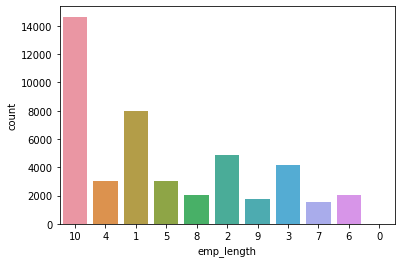

In [14]:
dfcheck['emp_length'].fillna(value=0,inplace=True)

dfcheck['emp_length'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)
sns.countplot(dfcheck.emp_length)

### Variation of interest rate with Debt- to- Income ratio
This shows that if the debt to income ration is high, then person is more likely not to pay off loan if interest rate is higher

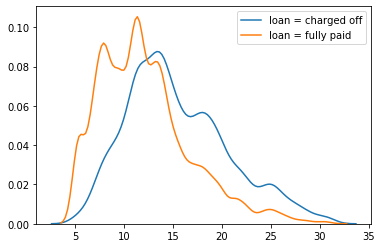

In [15]:
sns.kdeplot(dfcheck.loc[loan['loan_status'] == "Charged Off", 'int_rate'], label = 'loan = charged off')
sns.kdeplot(dfcheck.loc[loan['loan_status'] == "Fully Paid", 'int_rate'], label = 'loan = fully paid');

### Interest rate by grade for both cases

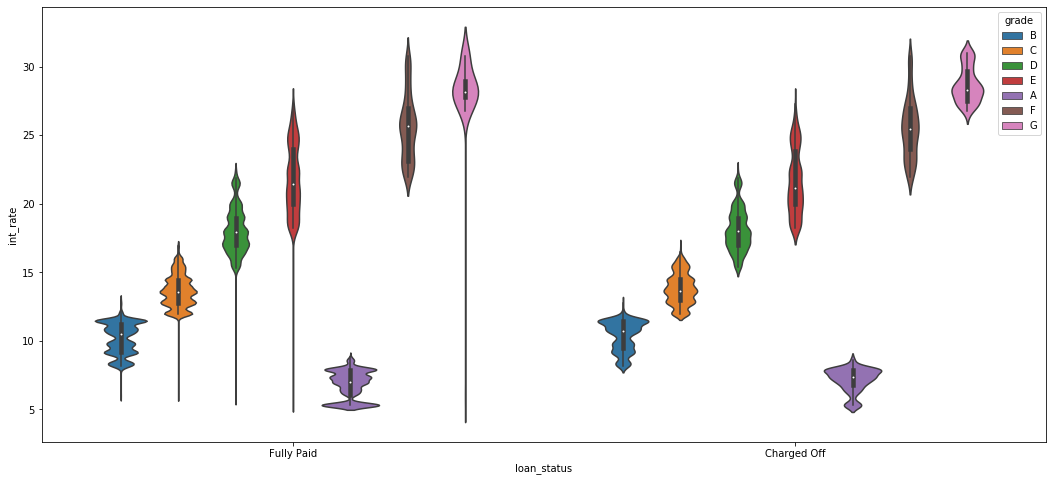

In [16]:
fig = plt.figure(figsize=(18,8))
sns.violinplot(x="loan_status",y="int_rate",data=dfcheck, hue="grade")

In [17]:
dfcheck.drop(['emp_title','title','zip_code', 'pymnt_plan'],axis=1,inplace=True)

C:\Users\fghan\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [18]:
# plt.scatter(loan.int_rate, loan.loan_amnt, annual_inc,c = 'b')
# plt.show()

In [19]:
dfcheck.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

term                     2
grade                    7
sub_grade               35
emp_length              11
home_ownership           4
verification_status      3
issue_d                  1
loan_status              2
purpose                 12
addr_state              50
earliest_cr_line         1
initial_list_status      2
last_pymnt_d             1
next_pymnt_d             0
last_credit_pull_d       1
application_type         2
hardship_flag            1
disbursement_method      2
debt_settlement_flag     2
dtype: int64

In [20]:
dfcheck.drop(['last_pymnt_d', 'next_pymnt_d', 'sub_grade'],axis=1,inplace=True)

In [21]:
dfcheck['term'] = dfcheck['term'].str.split(' ').str[1]

C:\Users\fghan\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Feature selection for modelling

In [22]:
features = ['loan_amnt', 'term', 'issue_d', 
            'installment', 'grade','emp_length',
            'home_ownership', 'annual_inc','verification_status',
            'purpose', 'dti', 'delinq_2yrs', 'inq_last_6mths', 
            'open_acc', 'pub_rec', 'pub_rec_bankruptcies', 'initial_list_status', 'last_credit_pull_d', 
            'loan_status', 'earliest_cr_line', 'mths_since_last_delinq', 
            'num_accts_ever_120_pd', 'mort_acc'
           ]
dfmodel= dfcheck[features]

Transforming date data into integer before hot encoding rest

In [23]:
dfmodel['issue_d']= pd.to_datetime(dfmodel['issue_d']).apply(lambda x: int(x.strftime('%Y')))
dfmodel['last_credit_pull_d']= pd.to_datetime(dfmodel['last_credit_pull_d'].fillna("2016-01-01")).apply(lambda x: int(x.strftime('%m')))
dfmodel['earliest_cr_line']= pd.to_datetime(dfmodel['earliest_cr_line'].fillna('2001-08-01')).apply(lambda x: int(x.strftime('%m')))
dfmodel.select_dtypes('object').apply(pd.Series.nunique, axis = 0)
dfmodel['mths_since_last_delinq'] = dfmodel['mths_since_last_delinq'].fillna(dfmodel['mths_since_last_delinq'].median())

C:\Users\fghan\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\fghan\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\fghan\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

Label-encoding object data

In [24]:
from sklearn import preprocessing

count = 0

for col in dfmodel:
    if dfmodel[col].dtype == 'object':
        if len(list(dfmodel[col].unique())) <= 2:     
            le = preprocessing.LabelEncoder()
            dfmodel[col] = le.fit_transform(dfmodel[col])
            count += 1
            print (col)

term
initial_list_status
loan_status


C:\Users\fghan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


Hot encoding more than 2 unique value data type object columns

In [25]:
dfmodel = pd.get_dummies(dfmodel)
loan.dropna(inplace=True)

### Modelling

#### Classification

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

dftarget = dfmodel['loan_status']
dfTrain= dfmodel.drop('loan_status',axis=1)
X_train, X_test, y_train, y_test = train_test_split(dfTrain,dftarget,test_size=0.20,random_state=42)

#### Random Forest Model

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

rf =  RandomForestClassifier(n_estimators = 20, min_samples_leaf=3)
# Train the model on training data
rf.fit(X_train, y_train);

In [32]:
rf.fit(X_test, y_test);
print(rf.score(X_test, y_test));

0.8780406899601946


In [33]:
from sklearn.metrics import log_loss

probs = rf.predict(X_test)
loss = log_loss(y_test, probs)
print ("LogLoss: %.2f " % (loss) )

LogLoss: 4.21 


In [34]:
lr_probs = rf.predict(X_test)
ns_probs = [0 for _ in range(len(y_test))]
#lr_probs = lr_probs[:, 1]

In [59]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
#lr_probs = lr_probs[:, 1]
# calculate scores
#ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
ns_auc = roc_auc_score(y_test, ns_probs)

In [60]:
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.700


In [61]:
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)

AUC: 0.700


In [62]:
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

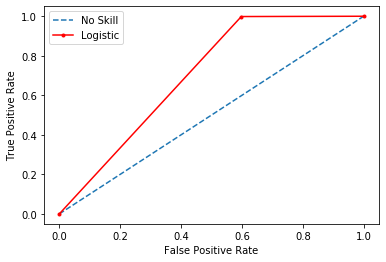

In [63]:
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic', color='red')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [64]:
#define function to calculate rmse and print score
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(rf):
   res = [rmse(rf.predict(X_train), y_train), rmse(rf.predict(X_valid), y_valid),
               rf.score(X_train, y_train), rf.score(X_valid, y_valid)]
   if hasattr(rf, 'oob_score_'): res.append(rf.oob_score_)
   print(res)

In [65]:
%time preds = np.stack([t.predict(X_test) for t in rf.estimators_])
np.mean(preds[:,0]), np.std(preds[:,0])

Wall time: 110 ms


(0.7, 0.45825756949558394)

In [66]:
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.datasets import make_classification

In [67]:
lr_probs = rf.predict(X_test)
ns_probs = [0 for _ in range(len(y_test))]
#lr_probs = lr_probs[:, 1]

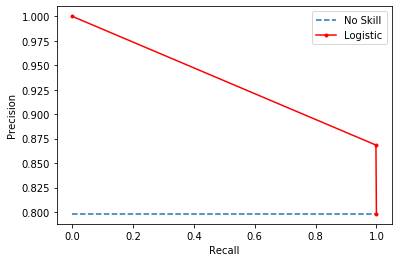

In [69]:
yhat = rf.predict(X_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
#lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)
# summarize scores
#print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic', color='red')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

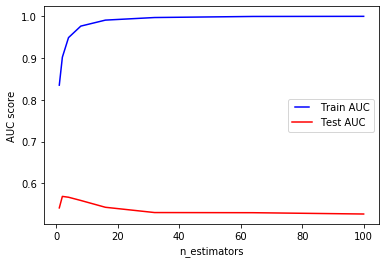

In [154]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100]
train_results = []
test_results = []
for estimator in n_estimators:
   model = RandomForestClassifier(n_estimators=estimator)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label="Train AUC")
line2, = plt.plot(n_estimators, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

#### Gradient Boosting 

In [71]:
from sklearn.ensemble import GradientBoostingRegressor
regressor = GradientBoostingRegressor(
    max_depth=13,
    n_estimators=100,
    learning_rate=1.0
)
regressor.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=1.0, loss='ls', max_depth=13,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [72]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
#errors = [mean_squared_error(y_test, y_pred) for y_pred in regressor.staged_predict(X_test)]
#best_n_estimators = np.argmin(errors)

In [73]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test, y_test)))

Learning rate:  0.05
Accuracy score (training): 0.811
Accuracy score (validation): 0.798
Learning rate:  0.075
Accuracy score (training): 0.811
Accuracy score (validation): 0.798
Learning rate:  0.1
Accuracy score (training): 0.811
Accuracy score (validation): 0.798
Learning rate:  0.25
Accuracy score (training): 0.811
Accuracy score (validation): 0.798
Learning rate:  0.5
Accuracy score (training): 0.812
Accuracy score (validation): 0.799
Learning rate:  0.75
Accuracy score (training): 0.811
Accuracy score (validation): 0.798
Learning rate:  1
Accuracy score (training): 0.811
Accuracy score (validation): 0.799


In [74]:
lr_probs = gb_clf.predict_proba(X_test)
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = lr_probs[:, 1]

In [75]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
#lr_probs = lr_probs[:, 1]
# calculate scores
#ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
ns_auc = roc_auc_score(y_test, ns_probs)

In [76]:
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.679


In [77]:
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

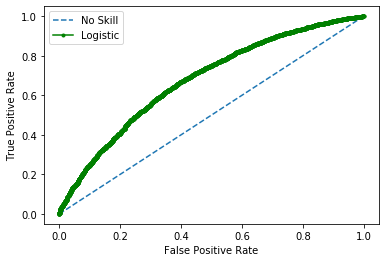

In [81]:
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic', color='green')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [82]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
from sklearn.datasets import make_classification

Logistic: f1=0.886 auc=0.881


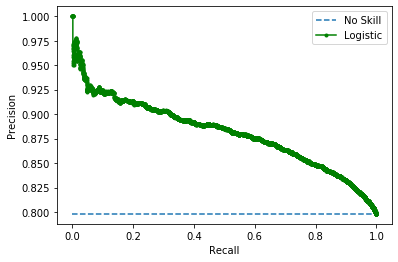

In [83]:
lr_probs = gb_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = gb_clf.predict(X_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic', color = 'green')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

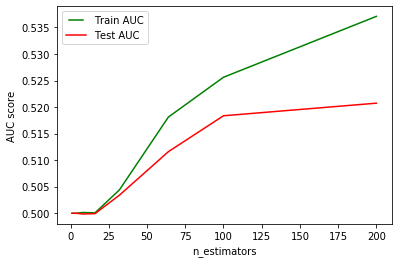

In [84]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []
for estimator in n_estimators:
   model = GradientBoostingClassifier(n_estimators=estimator)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label="Train AUC", color='green')
line2, = plt.plot(n_estimators, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

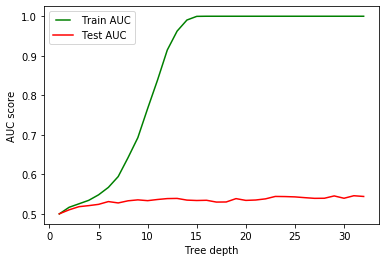

In [86]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   model = GradientBoostingClassifier(max_depth=max_depth)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label="Train AUC", color='green')
line2, = plt.plot(max_depths, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

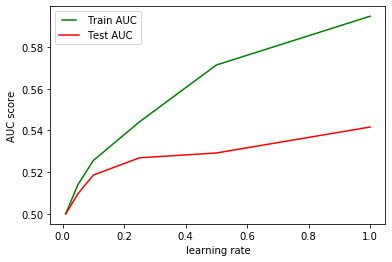

In [85]:
learning_rates = [1, 0.5, 0.25, 0.1, 0.05, 0.01]
train_results = []
test_results = []
for eta in learning_rates:
   model = GradientBoostingClassifier(learning_rate=eta)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results, 'b', label="Train AUC", color='green')
line2, = plt.plot(learning_rates, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('learning rate')
plt.show()

### Elastic Net

In [87]:
from sklearn.linear_model import ElasticNetCV
from sklearn.datasets import make_regression
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error

In this model, the alphas represent the variation of the best alpha fot got pur model, we will define multiple valyes and check the performance accuracy.

In the model function, we define ElasticNet model by setting alpha and train it with x and y data. Then we will check the R- Squared, MSE and RMSE metrics for each alpha.

In [88]:
alphas = [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1]

In [89]:
for a in alphas:
    model = ElasticNet(alpha=a).fit(X_train, y_train)   
    score = model.score(X_train, y_train)
    pred_y = model.predict(X_train)
    mse = mean_squared_error(y_train, pred_y)   
    print("Alpha:{0:.4f}, R2:{1:.2f}, MSE:{2:.2f}, RMSE:{3:.2f}"
       .format(a, score, mse, np.sqrt(mse)))

Alpha:0.0001, R2:0.09, MSE:0.14, RMSE:0.37
Alpha:0.0010, R2:0.09, MSE:0.14, RMSE:0.37
Alpha:0.0100, R2:0.07, MSE:0.14, RMSE:0.38
Alpha:0.1000, R2:0.02, MSE:0.15, RMSE:0.39
Alpha:0.3000, R2:0.02, MSE:0.15, RMSE:0.39
Alpha:0.5000, R2:0.02, MSE:0.15, RMSE:0.39
Alpha:0.7000, R2:0.01, MSE:0.15, RMSE:0.39
Alpha:1.0000, R2:0.01, MSE:0.15, RMSE:0.39


In [90]:
elastic=ElasticNet(alpha=0.7).fit(X_train, y_train)
ypred = elastic.predict(X_test)
score = elastic.score(X_test, y_test)
mse = mean_squared_error(y_test, ypred)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}"
      .format(score, mse, np.sqrt(mse)))

R2:0.009, MSE:0.16, RMSE:0.40


------ElasticNetCV-------------

cross validation with elastic net CV- can search multiple alpha values and applies the best one. We'll define the model with alphas and fit it with x and y train.

In [93]:
elastic_cv=ElasticNetCV(alphas=alphas, cv=5)
model = elastic_cv.fit(X_train, y_train)
print(model.alpha_)
print(model.intercept_)

0.0001
0.7648964428356144


In [94]:
ypred = model.predict(X_test)
score = model.score(X_test, y_test)
mse = mean_squared_error(y_test, ypred)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}"
      .format(score, mse, np.sqrt(mse)))

R2:0.090, MSE:0.15, RMSE:0.38


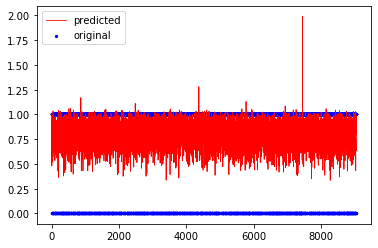

In [95]:
x_ax = range(len(X_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

In [96]:
lr_probs = elastic_cv.predict(X_test)
ns_probs = [0 for _ in range(len(y_test))]
#lr_probs = lr_probs[:, 1]

In [97]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
#lr_probs = lr_probs[:, 1]
# calculate scores
#ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
ns_auc = roc_auc_score(y_test, ns_probs)

In [98]:
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.712


In [99]:
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

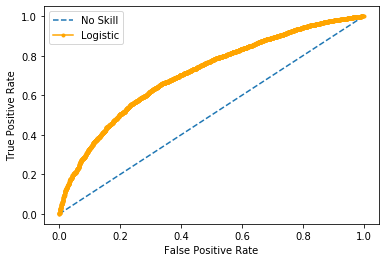

In [104]:
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic', color = 'orange')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

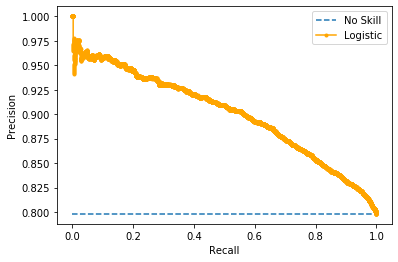

In [105]:
#lr_probs = elastic.predict_proba(X_test)
# keep probabilities for the positive outcome only
#lr_probs = lr_probs[:, 1]
# predict class values
yhat = elastic_cv.predict(X_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
#lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)
# summarize scores
#print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic', color = 'orange')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

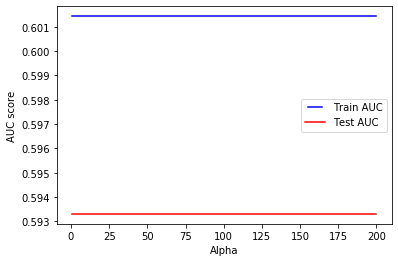

In [103]:
alphas = [ 0.7, 1, 10, 100, 200]
train_results = []
test_results = []
for a in alphas:
   model = ElasticNetCV(alphas)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(alphas, train_results, 'b', label="Train AUC")
line2, = plt.plot(alphas, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Alpha')
plt.show()

In [101]:
best_alpha_ind=np.argmax(alphas)
print("Best alpha=",alphas[best_alpha_ind])

Best alpha= 1


### Deep Learning

1) Helix neural network: Standard neural network structure that have been continued throgh space using different values of shared weights
2) Repeated neural network: continues through time via using edges that are delievered into the following time ste rather than feeding into the adjoining layer at the following step 
3) Repeated NN: hierarchical NN that don't incude a time prospect to the inputted entity bu may have inputs need to be processed in a hierarchical prospect like as tree
4) A standard deep NN which includes a vairation layer with differnt typed without a particulat order or any repetition

In [51]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

In [52]:
print(X_train.shape); print(X_test.shape)

(36173, 54)
(9044, 54)


In [53]:
import os, sys, re
from keras.models import Sequential
from keras.layers import Dense
import time
import numpy as np
import pandas as pd

ModuleNotFoundError: No module named 'keras'

In [54]:
# Create the model 
model = Sequential()

# Define the four layered model
model.add(Dense(110, input_dim = 54, kernel_initializer = "uniform", activation = "relu"))
model.add(Dense(110, kernel_initializer = "uniform", activation = "relu"))
model.add(Dense(110, kernel_initializer = "uniform", activation = "relu"))
model.add(Dense(1, kernel_initializer = "uniform", activation = "sigmoid"))

# Compile the model
model.compile(loss="binary_crossentropy", optimizer= "adam", metrics=['accuracy'])
#

NameError: name 'Sequential' is not defined

In [174]:
# Compile the model
model.compile(loss="binary_crossentropy", optimizer= "adam", metrics=['accuracy'])
#

In [112]:
model.fit(X_train, y_train, epochs= 220, batch_size=200)

Epoch 1/220
36173/36173 [==============================] - 0s 11us/step - loss: 2.2845 - accuracy: 0.7576
Epoch 2/220
36173/36173 [==============================] - 0s 9us/step - loss: 0.4950 - accuracy: 0.8101
Epoch 3/220
36173/36173 [==============================] - 0s 9us/step - loss: 0.5021 - accuracy: 0.8085
Epoch 4/220
36173/36173 [==============================] - 0s 9us/step - loss: 0.4859 - accuracy: 0.8105
Epoch 5/220
36173/36173 [==============================] - 0s 9us/step - loss: 0.4846 - accuracy: 0.8102
Epoch 6/220
36173/36173 [==============================] - 0s 9us/step - loss: 0.4792 - accuracy: 0.8106
Epoch 7/220
36173/36173 [==============================] - 0s 9us/step - loss: 0.4782 - accuracy: 0.8105
Epoch 8/220
36173/36173 [==============================] - 0s 9us/step - loss: 0.4856 - accuracy: 0.8105
Epoch 9/220
36173/36173 [==============================] - 0s 9us/step - loss: 0.4775 - accuracy: 0.8106
Epoch 10/220
36173/36173 [============================

36173/36173 [==============================] - 0s 9us/step - loss: 0.4855 - accuracy: 0.8106
Epoch 155/220
36173/36173 [==============================] - 0s 9us/step - loss: 0.4855 - accuracy: 0.8106
Epoch 156/220
36173/36173 [==============================] - 0s 9us/step - loss: 0.4854 - accuracy: 0.8106
Epoch 157/220
36173/36173 [==============================] - 0s 9us/step - loss: 0.4855 - accuracy: 0.8106
Epoch 158/220
36173/36173 [==============================] - 0s 9us/step - loss: 0.4855 - accuracy: 0.8106
Epoch 159/220
36173/36173 [==============================] - 0s 9us/step - loss: 0.4855 - accuracy: 0.8106
Epoch 160/220
36173/36173 [==============================] - 0s 9us/step - loss: 0.4855 - accuracy: 0.8106
Epoch 161/220
36173/36173 [==============================] - 0s 9us/step - loss: 0.4855 - accuracy: 0.8106
Epoch 162/220
36173/36173 [==============================] - 0s 9us/step - loss: 0.4854 - accuracy: 0.8106
Epoch 163/220
36173/36173 [========================

In [113]:
performance = model.evaluate(X_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], performance[1]*100))

9044/9044 [==============================] - 0s 15us/step
accuracy: 79.81%


In [175]:
lr_probs = model.predict(X_test)
ns_probs = [0 for _ in range(len(y_test))]

In [176]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
#lr_probs = lr_probs[:, 1]
# calculate scores
#ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
ns_auc = roc_auc_score(y_test, ns_probs)

In [177]:
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.563


In [178]:
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

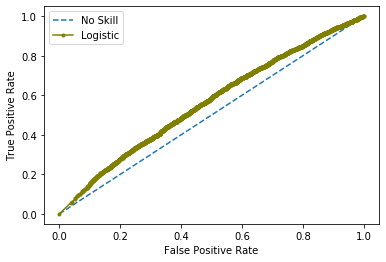

In [179]:
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic', color = 'olive')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [142]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
from sklearn.datasets import make_classification

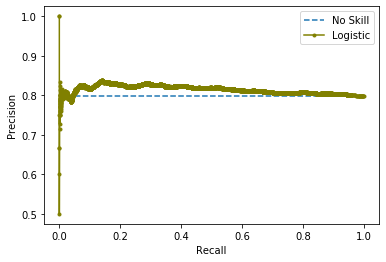

In [136]:
#lr_probs = elastic.predict_proba(X_test)
# keep probabilities for the positive outcome only
#lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(X_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
#lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)
# summarize scores
#print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic', color = 'olive')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()